In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.patches as mpatches

In [76]:
df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')

In [77]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [78]:
files = [x for x in os.listdir('./Sales_Data')]

all_months = pd.DataFrame()

for x in files :
    df=pd.read_csv('./Sales_Data/'+x)
    all_months=pd.concat([all_months, df])
    
all_months.to_csv('Sales with 12months.csv', index= False)

In [79]:
df1= pd.read_csv(r"C:\Users\Chapman\Data Analyst Project Folder\Real World Data Analysis\Sales with 12months.csv")

<AxesSubplot:>

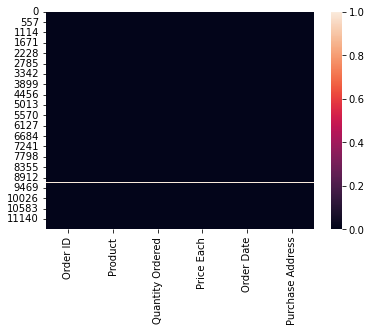

In [80]:
df1.isnull().sum()
sns.heatmap(df.isnull())

In [81]:
df1=df1.dropna()
df1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [82]:
df2 = df1[df1['Order Date'].str[0:2] != 'Or']
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [83]:
df2['Order Date'] = pd.to_datetime(df2['Order Date'])

C:\Users\Chapman\AppData\Local\Temp\ipykernel_207124\1288459440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Order Date'] = pd.to_datetime(df2['Order Date'])


In [84]:
df2.insert(5,'Months',df2['Order Date'].dt.month)

In [85]:
df2['Price Each'] = pd.to_numeric(df2['Price Each'])
df2['Quantity Ordered'] = pd.to_numeric(df2['Quantity Ordered'])

C:\Users\Chapman\AppData\Local\Temp\ipykernel_207124\692146747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price Each'] = pd.to_numeric(df2['Price Each'])
C:\Users\Chapman\AppData\Local\Temp\ipykernel_207124\692146747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Quantity Ordered'] = pd.to_numeric(df2['Quantity Ordered'])


In [86]:
df2['Sales'] = df2['Quantity Ordered'] * df2['Price Each']
df2.head()

C:\Users\Chapman\AppData\Local\Temp\ipykernel_207124\1078073136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sales'] = df2['Quantity Ordered'] * df2['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Months,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",11.99


## Best month of Sales & how much was the earn in that month?

In [87]:
bar = df2.groupby('Months').sum().sort_values(by=['Sales'],ascending=False).reset_index()
bar

,Months,Quantity Ordered,Price Each,Sales
0,12,28114,4588415.41,4613443.34
1,10,22703,3715554.83,3736726.88
2,4,20558,3367671.02,3390670.24
3,11,19798,3180600.68,3199603.20
4,5,18667,3135125.13,3152606.75
5,3,17005,2791207.83,2807100.38
6,7,16072,2632539.56,2647775.76
7,6,15253,2562025.61,2577802.26
8,8,13448,2230345.42,2244467.88
9,2,13449,2188884.72,2202022.42


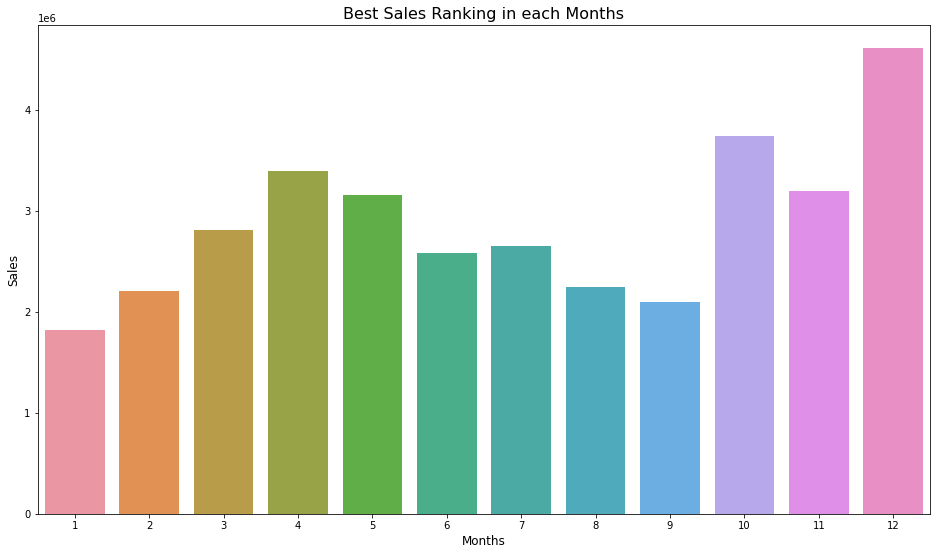

Best Month would be December with 4million sales


In [88]:
plt.figure(figsize = (16,9))
sns.barplot(data=bar,x='Months',y='Sales')
plt.title('Best Sales Ranking in each Months', size= 16)
plt.xlabel('Months', size =12)
plt.ylabel('Sales', size =12)
plt.show()

print('Best Month would be December with 4million sales')

## What city sold the most product? 

In [89]:
df2['City']=df2['Purchase Address'].apply(lambda x:x.split(',')[1])
df2.head()

C:\Users\Chapman\AppData\Local\Temp\ipykernel_207124\304836678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['City']=df2['Purchase Address'].apply(lambda x:x.split(',')[1])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Months,Purchase Address,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles


In [90]:
city=df2.groupby('City').sum().sort_values(by=['Quantity Ordered'],ascending=False)
city

,Quantity Ordered,Price Each,Months,Sales
City,,,,
San Francisco,50239,8211461.74,315520,8262203.91
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Atlanta,16602,2779908.20,104794,2795498.58
Seattle,16553,2733296.01,104941,2747755.48
Portland,14053,2307747.47,87765,2320490.61
Austin,11153,1809873.61,69829,1819581.75


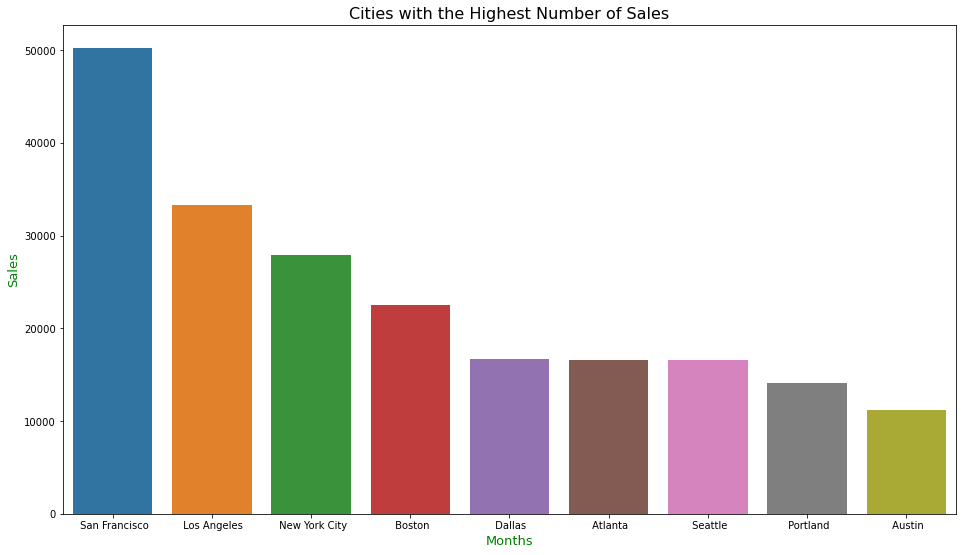

San Francisco sold the most products


In [91]:
plt.figure(figsize = (16,9))
sns.barplot(data=city,x=city.index,y='Quantity Ordered')
plt.title('Cities with the Highest Number of Sales', size= 16)
plt.xlabel('Months', size =13 , color='green')
plt.ylabel('Sales', size =13, color ='green')
plt.show()

print('San Francisco sold the most products')

## When should the company display their advertising to maximize their profit?

In [92]:
df2.insert(6,'Hour',df2['Order Date'].dt.hour)

In [93]:
df2.insert(7,'Mins',df2['Order Date'].dt.minute)

In [94]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Months,Hour,Mins,Purchase Address,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,8,46,"917 1st St, Dallas, TX 75001",23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,22,30,"682 Chestnut St, Boston, MA 02215",99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,14,38,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,9,27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles


In [95]:
best_hour=df2.groupby('Hour').count().sort_values(by=['Sales'],ascending=False).reset_index()
best_hour

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Months,Mins,Purchase Address,Sales,City
0,19,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905
1,12,12587,12587,12587,12587,12587,12587,12587,12587,12587,12587
2,11,12411,12411,12411,12411,12411,12411,12411,12411,12411,12411
3,18,12280,12280,12280,12280,12280,12280,12280,12280,12280,12280
4,20,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228
5,13,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129
6,14,10984,10984,10984,10984,10984,10984,10984,10984,10984,10984
7,10,10944,10944,10944,10944,10944,10944,10944,10944,10944,10944
8,21,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921
9,17,10899,10899,10899,10899,10899,10899,10899,10899,10899,10899


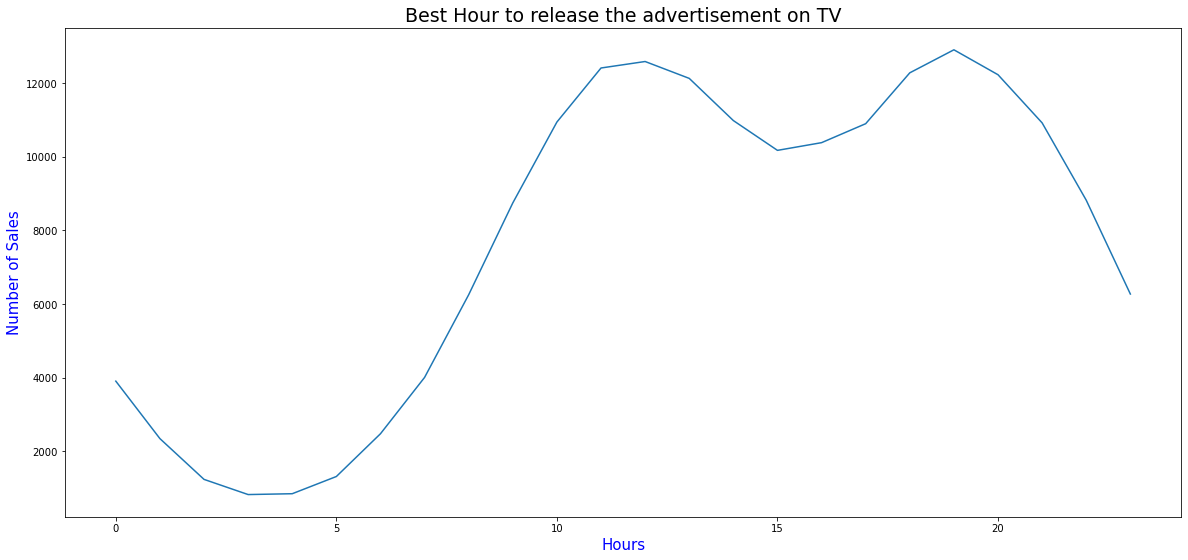

 Best Time to display the advertisement would be 7pm


In [96]:
plt.figure(figsize = (20,9))
sns.lineplot(data= best_hour,x='Hour',y='Sales')
plt.title('Best Hour to release the advertisement on TV', size= 19)
plt.xlabel('Hours', size =15 , color='blue')
plt.ylabel('Number of Sales', size =15, color ='blue')
plt.show()

print(' Best Time to display the advertisement would be 7pm')

##  What products are most often sold together?


In [97]:
duo=df2[df2['Order ID'].duplicated(keep= False)]
duo['Grouped']= duo.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

duo=duo[['Order ID','Grouped']].drop_duplicates()

duo.head()

C:\Users\Chapman\AppData\Local\Temp\ipykernel_207124\1238520781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duo['Grouped']= duo.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [98]:
from itertools import combinations
from collections import Counter

count= Counter()

for x in duo['Grouped']:
    list=x.split(',')
    count.update(Counter(combinations(list,2)))
    
for x,y in count.most_common(10):
    print(x,y)
print()
print()  
print()  
print('Iphone and Lighting Charging Cable sold together the most often')

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92



Iphone and Lighting Charging Cable sold together the most often


## Which Product have sold the most often?

In [99]:
product=df2.groupby('Product').sum()['Quantity Ordered'].sort_values().reset_index()
product

,Product,Quantity Ordered
0,LG Dryer,646
1,LG Washing Machine,666
2,Vareebadd Phone,2068
3,20in Monitor,4129
4,ThinkPad Laptop,4130
5,Macbook Pro Laptop,4728
6,Flatscreen TV,4819
7,Google Phone,5532
8,34in Ultrawide Monitor,6199
9,27in 4K Gaming Monitor,6244


In [100]:
prices=df2.groupby('Product').mean()['Price Each'].sort_values().reset_index()
prices

,Product,Price Each
0,AAA Batteries (4-pack),2.99
1,AA Batteries (4-pack),3.84
2,USB-C Charging Cable,11.95
3,Wired Headphones,11.99
4,Lightning Charging Cable,14.95
5,Bose SoundSport Headphones,99.99
6,20in Monitor,109.99
7,27in FHD Monitor,149.99
8,Apple Airpods Headphones,150.00
9,Flatscreen TV,300.00


In [101]:
merged_df = pd.merge(product,prices,how='inner')

In [102]:
merged_df

,Product,Quantity Ordered,Price Each
0,LG Dryer,646,600.00
1,LG Washing Machine,666,600.00
2,Vareebadd Phone,2068,400.00
3,20in Monitor,4129,109.99
4,ThinkPad Laptop,4130,999.99
5,Macbook Pro Laptop,4728,1700.00
6,Flatscreen TV,4819,300.00
7,Google Phone,5532,600.00
8,34in Ultrawide Monitor,6199,379.99
9,27in 4K Gaming Monitor,6244,389.99


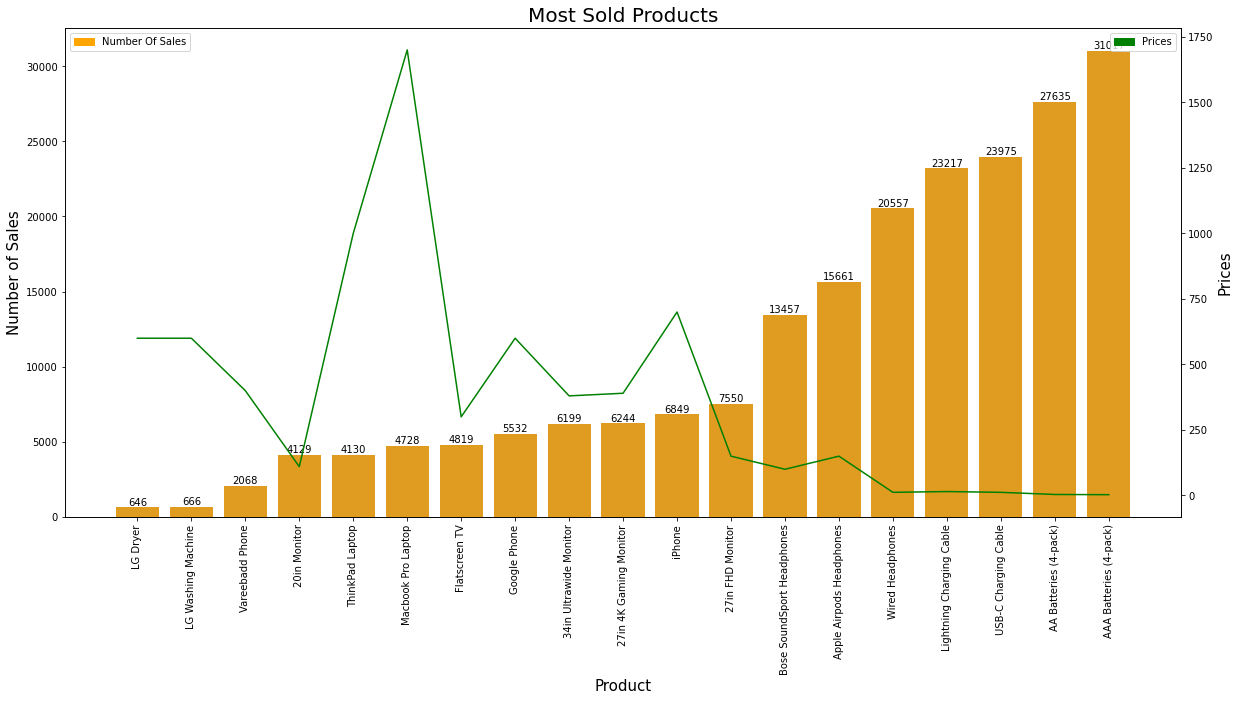

We can Assume that As Prices go up, demand of the product go down


In [103]:
fig,ax1 = plt.subplots(figsize=(20,9))

ax2=ax1.twinx()

sns.barplot(data= merged_df,x='Product',y ='Quantity Ordered',ax=ax1,color='orange')

sns.lineplot(data= merged_df, x='Product', y ='Price Each',ax=ax2,color='green')



plt.title('Most Sold Products', size= 20)
ax1.set_xlabel('Product', size =15 )
ax1.set_ylabel('Number of Sales', size =15)
ax2.set_ylabel('Prices', size =15)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1_patch=mpatches.Patch(color= 'orange', label='Number Of Sales')
ax1.legend(handles=[ax1_patch], loc='upper left')
ax2_patch=mpatches.Patch(color= 'green', label='Prices')
ax2.legend(handles=[ax2_patch], loc='upper right')


for i in ax1.containers:
    ax1.bar_label(i)
    
plt.show()

print('We can Assume that As Prices go up, demand of the product go down')